In [13]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.regularizers import l2

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
regularization = l2(0.02)
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", kernel_regularizer = regularization, input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu", kernel_regularizer = regularization))
model.add(Conv2D(16, kernel_size=3, activation="relu", kernel_regularizer = regularization))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [20]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 16)        4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                77450     
Total params: 101,178
Trainable params: 101,178
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0396 - accuracy: 0.9916 - val_loss: 0.0719 - val_accuracy: 0.9823
Epoch 2/3
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0367 - accuracy: 0.9929 - val_loss: 0.0768 - val_accuracy: 0.9823
Epoch 3/3
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0349 - accuracy: 0.9931 - val_loss: 0.0800 - val_accuracy: 0.9811


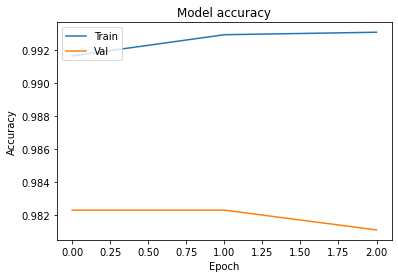

In [28]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

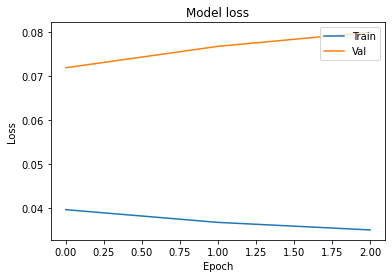

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()